# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 2
<p>Estadística descriptiva, visualización y preparación de datos.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

Cargar el Dataset "*Indian-Liver-Patient*" del repositorio UCI Machine Learning y desarrollar los siguientes puntos:
- Identificar las variables susceptibles de aplicar transformación.
- Aplicar a una variable numerica todos los metodos de escalado vistos.
- Comparar gráficamente la variación para cada caso de la variable escalada respecto a la original.

***Fuente:*** *https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)*

<div style="font-size:14px; text-align:justify"><b>1: </b>Identificación variables susceptibles de aplicar transformación.</div>

Como transformaciones a realizar a un atributo del dataset, tenemos:
- Tratamiento de datos categóricos.
- Reescalado de datos.
- Estandarización de datos.

Para conocer los atributos susceptibles de dischas trnasformaciones, es necesario conocer la descripción de los mismos para el caso de datos categóricos en las variables de entrada, ya que debemos tener valores numericos en estas para poder ser tratados.<br>
En el caso de el reescalado y/o estandarización, se deberá conocer la distribución de los datos y evitar por ejemplo, un sesgo de datos.

In [2]:
# Constantes del dataframe
ATRIB_NAMES=['age', 'gen', 'tbili', 'dbili', 'alkphos', 'sgpt','sgot', 'tp', 'alb', 'ag' ,'class']
FILENAME='Indian Liver Patient Dataset (ILPD).csv'

# Lectura del dataset
df=read_csv(filepath_or_buffer=FILENAME, names=ATRIB_NAMES)

# Separar en datos de entrada y variable independiente
x=df[df.columns[:-1]].copy()
y=df[df.columns[-1:]].copy()
display(x,y)

,age,gen,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00


,class
0,1
1,1
2,1
3,1
4,1
...,...
578,2
579,1
580,1
581,1


In [3]:
# Mostrar caracteristicas de los atributos del dataset
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      583 non-null    int64  
 1   gen      583 non-null    object 
 2   tbili    583 non-null    float64
 3   dbili    583 non-null    float64
 4   alkphos  583 non-null    int64  
 5   sgpt     583 non-null    int64  
 6   sgot     583 non-null    int64  
 7   tp       583 non-null    float64
 8   alb      583 non-null    float64
 9   ag       579 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


Con la información obtenida del dataframe, la variable *gen* se describe como *object*, por lo que debe ser transformada en un valor que posteriormente el modelo pueda interpretar. Por tanto, se le aplica **OneHotEncoder** de Scikit-learn para obtener un valor numerico de la caracteristica.

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Creamos  una instancia de OneHotEncoder con los paramteros pertinentes
ohe=OneHotEncoder(drop='if_binary')

# Crear un daraframe auxiliar con las columnas categoricas a procesar
x_cat=x.select_dtypes(include=['object'])

# Transformación de las variables categóricas con la instancia OHE
ohe.fit(x_cat)
x_cat_trs=ohe.transform(x_cat).toarray()

# Comparación de los datos transformados
x_cat, x_cat_trs[:5], x_cat_trs[-5:], type(x_cat_trs[0][0])

(        gen
 0    Female
 1      Male
 2      Male
 3      Male
 4      Male
 ..      ...
 578    Male
 579    Male
 580    Male
 581    Male
 582    Male
 
 [583 rows x 1 columns],
 array([[0.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 numpy.float64)

Con la transformación OHE, se ve en la comparación como los parámetros *Female*  han tomado el valor *0* y *Male* el valor *1*, cuyo formato es *float64*.

Para la tranformación de los atributos numéricos, se hará en base a al **análisis visual de los datos** y que por sus características se vean sujetos a una necesaria transformación.

<AxesSubplot:>

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


'Sesgo de la distribución:'

age        -0.029385
tbili       4.907474
dbili       3.212403
alkphos     3.765106
sgpt        6.549192
sgot       10.546177
tp         -0.285672
alb        -0.043685
ag          0.992299
dtype: float64

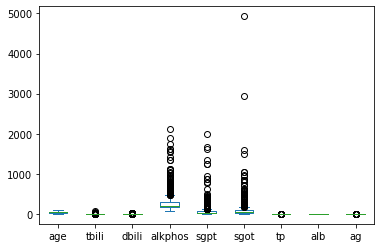

In [5]:
# Dataframe auxiliar con los  atributos numéricos
x_num=x.select_dtypes(include=['int64', 'float64'])

# Representación boxplot de los atributos
display(x_num.plot(kind='box'), x_num.describe(), 'Sesgo de la distribución:', x_num.skew())

Con la ayuda de la descripción de los parámetros y el Diagrama de Caja, observamos que:<br>
- **Age**: Valores minimo y máximo lógicos. Sin sesgado de valores.
- **Tbili** (Total Bilirubin): Valores sesgados a la derecha, con un valor máximo elevado según valores normales (de 1.71 a 20.5 µmol/L).
- **Dbili** (Direct Bilirubin): Valores sesgados a la derecha, con un valor máximo elevado según valores normale (menos de 5.1 µmol/L).
- **Alkphos** (Alkaline Phosphotase): Valores sesgados a la derecha, con valor máximo muy elevado según valores normales (44 a 147 (IU/L)).
- **Sgpt** (Alamine Aminotransferase): Valores sesgados a la derecha, con valor máximo muy elevado según valores normales (4 a 36 U/L).
- **Sgot** (Aspartate Aminotransferase): Valores muy sesgados a la derecha, con valor máximo excesivamente elevado según valores normales (8 a 33 U/L).
- **Tp** (Total Protiens): Valores sin sesgado con valores minimo y máximo dentro del rango de las medidas normales (6.0 a 8.3 g/dL).
- **Alb** (Albumin): Valores sin sesgados, con valor minimo por debajo según valores normales (3.4 a 5.4 g/dL).
- **Ag** (Ratio Albumin and Globulin Ratio): Valores ligeramente sesgados a la derecha, con valores minimo y maximo fuera del rango normal (1 a 2)


En base a estos datos y sin tener algún comentario por parte de expertos de los datos, la transformación de los datos a realizar sería para *Alkphos*, *Sgpt* y *Sgot* con la 
idea de la **Estandarización Robusta de los datos** ya que se trata de atributos cuyos valores difieren del resto. En adición a esto, se debería revisar los datos y comprobar que no 
existe un error en los mismos.<br>
Para *tbili*, *dbili*, *tp* y *ag*, realizaría una **Estandarización estándar de los datos** de modo que no existiera un sesgo en los mismos.

***Nota:*** *Estas conclusiones se han obtenido sin tener información de las unidades de las medidas del Dataset.*

***Fuente:***<br>
*- https://medlineplus.gov/spanish/ency/article/003479.htm#:~:text=Un%20nivel%20normal%20es%3A,1.71%20a%2020.5%20%C2%B5mol%2FL)*<br>
*- https://www.mountsinai.org/health-library/tests/alp-blood-test#:~:text=Normal%20Results,vary%20with%20age%20and%20sex.*<br>
*- https://www.mountsinai.org/health-library/tests/aspartate-aminotransferase-ast-blood-test#:~:text=Normal%20Results,or%20may%20test%20different%20samples.*<br>
*- https://www.mountsinai.org/health-library/tests/alanine-transaminase-alt-blood-test#:~:text=Normal%20Results,vary%20slightly%20among%20different%20laboratories.*<br>
*- https://www.mountsinai.org/health-library/tests/total-protein#:~:text=Normal%20Results,of%20your%20specific%20test%20results.*<br>
*- https://medlineplus.gov/spanish/ency/article/003480.htm#:~:text=El%20rango%20normal%20es%20de,o%20pueden%20evaluar%20diferentes%20muestras.*<br>
*- https://www.healthline.com/health/a-g-ratio-high#:~:text=The%20normal%20range%20for%20albumin,classified%20as%20high%20or%20low.*<br>

<div style="font-size:14px; text-align:justify"><b>2: </b>Aplicacion de los diferentes métodos de escalado a una de las variables.</div>

Para el escalado de los datos, se decide escoger el atributo **sgpt** (Alamine Aminotransferase).

In [6]:
# Dataframe para el resultado de reescalados
df_resc=x_num[['sgpt']].copy()

<div style="font-size:14px; text-align:center"><b>MinMax Scaler</b><br></div>

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Instancia del escalado según Minimo y Maximo
minmax_scaler=MinMaxScaler(feature_range=(0, 1))

# Modelo en base a los datos y reescalado en base a este
minmax_scaler.fit(x_num[['sgpt']])
sgpt_minmax=minmax_scaler.transform(x_num[['sgpt']])

# Datos obtenidos
df_resc=df_resc.assign(sgpt_minmax = sgpt_minmax)

<div style="font-size:14px; text-align:center"><b>Estandarización Estándar</b><br></div>

In [8]:
from sklearn.preprocessing import StandardScaler

# Instancia del escalado
std_scaler=StandardScaler()

# Modelo en base a los datos y reescalado en base a este
sgpt_std=std_scaler.fit_transform(x_num[['sgpt']])

# Datos obtenidos
df_resc=df_resc.assign(sgpt_std = sgpt_std)

<div style="font-size:14px; text-align:center"><b>Estandarización Robusta</b><br></div>

In [9]:
from sklearn.preprocessing import RobustScaler

# Instancia del escalado y creación de modelo
rbst_scaler=RobustScaler().fit(x_num[['sgpt']])

# Reescalado en base a modelo
sgpt_rbst=rbst_scaler.transform(x_num[['sgpt']])

# Datos obtenidos
df_resc=df_resc.assign(sgpt_rbst = sgpt_rbst)

<div style="font-size:14px; text-align:justify"><b>3: </b>Comparación gráfica del reescalado de la variable escogida.</div>

En base a los cambios realizados, los resultados para cada una de las transformaciones resulta el siguiente:

In [18]:
df_resc.describe()

,sgpt,sgpt_minmax,sgpt_std,sgpt_rbst
count,583.000000,583.000000,5.830000e+02,583.000000
mean,80.713551,0.035534,-1.218770e-17,1.219028
std,182.620356,0.091769,1.000859e+00,4.869876
min,10.000000,0.000000,-3.875487e-01,-0.666667
25%,23.000000,0.006533,-3.163016e-01,-0.320000
50%,35.000000,0.012563,-2.505351e-01,0.000000
75%,60.500000,0.025377,-1.107812e-01,0.680000
max,2000.000000,1.000000,1.051873e+01,52.400000


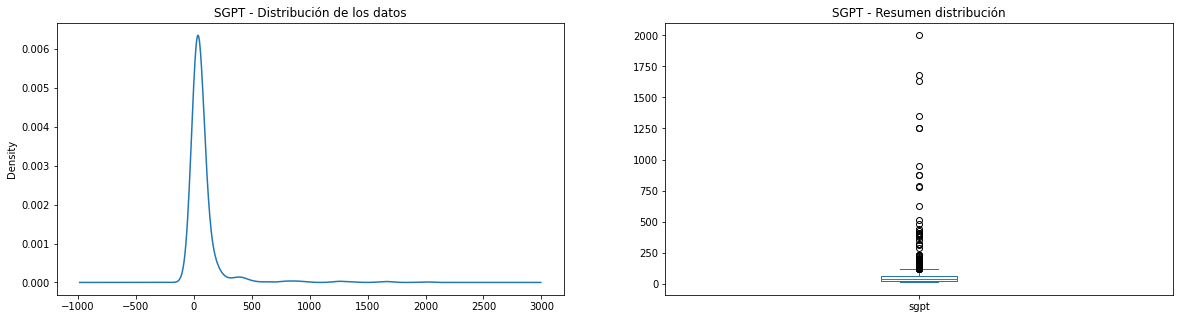

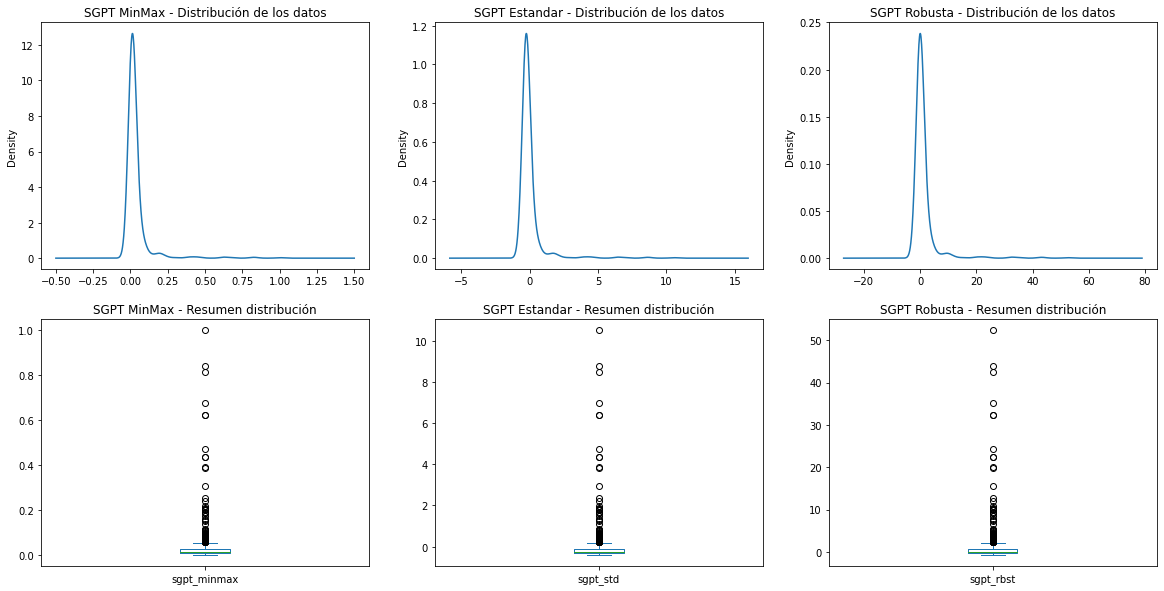

(None,
 sgpt           6.549192
 sgpt_minmax    6.549192
 sgpt_std       6.549192
 sgpt_rbst      6.549192
 dtype: float64)

In [19]:
# Representación actual de los datos para dicho atributo
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))

df_resc['sgpt'].plot(kind='density', ax=axes[0]).set(title='SGPT - Distribución de los datos')
df_resc['sgpt'].plot(kind='box', ax=axes[1]).set(title='SGPT - Resumen distribución')

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

df_resc['sgpt_minmax'].plot(kind='density', ax=axes[0,0]).set(title='SGPT MinMax - Distribución de los datos')
df_resc['sgpt_std'].plot(kind='density', ax=axes[0,1]).set(title='SGPT Estandar - Distribución de los datos')
df_resc['sgpt_rbst'].plot(kind='density', ax=axes[0,2]).set(title='SGPT Robusta - Distribución de los datos')

df_resc['sgpt_minmax'].plot(kind='box', ax=axes[1,0]).set(title='SGPT MinMax - Resumen distribución')
df_resc['sgpt_std'].plot(kind='box', ax=axes[1,1]).set(title='SGPT Estandar - Resumen distribución')
df_resc['sgpt_rbst'].plot(kind='box', ax=axes[1,2]).set(title='SGPT Robusta - Resumen distribución')

plt.show(), df_resc.skew()